# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [52]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)

In [55]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [59]:

orders['wait_time'] = orders.wait_time
orders['expected_wait_time'] = orders.expected_wait_time
orders['delay_vs_expected'] = orders.delay_vs_expected
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,-13.058462,-24.378307,10.916806,0.592187,0.097610,4.155688,1.141687,1.141687,136.654623,22.757810
std,9.462705,8.756588,10.112261,0.491431,0.296788,1.284979,0.535362,0.535362,207.444085,21.496018
min,-209.000000,-156.000000,-189.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,-16.000000,-29.000000,6.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,-11.000000,-24.000000,11.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,-7.000000,-19.000000,16.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,-1.000000,-3.000000,146.000000,1.000000,1.000000,5.000000,21.000000,21.000000,13440.000000,1794.960000


📈 Plot histograms to get a sense of the distribution of each numerical feature.

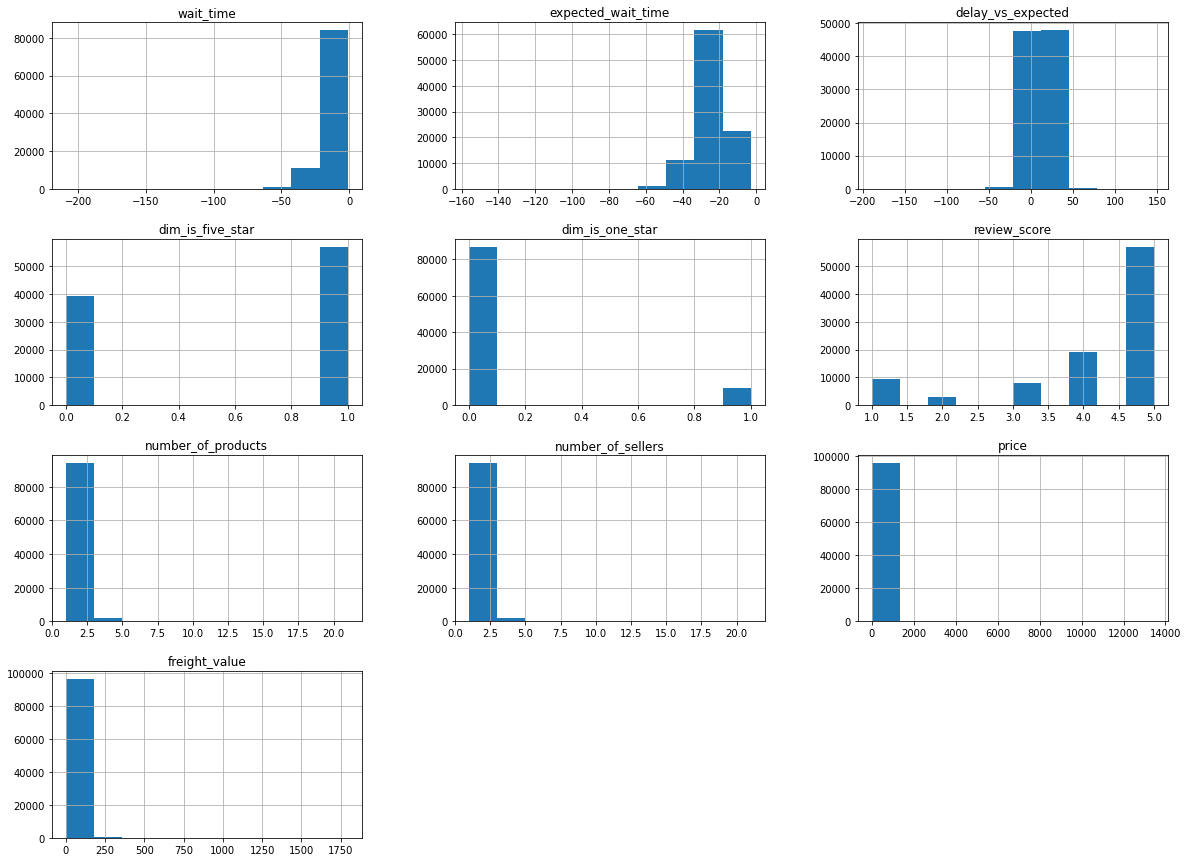

In [60]:
orders.hist(figsize=(20, 15));

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

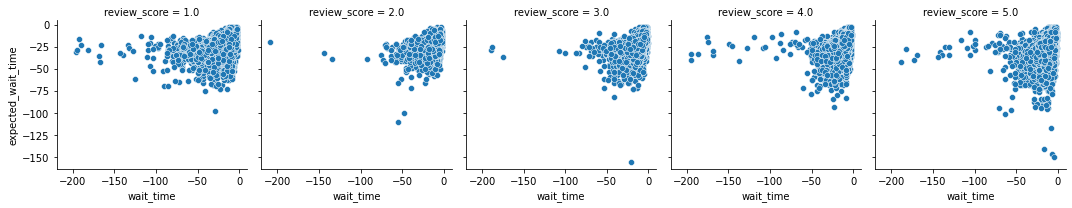

In [62]:
g = sns.FacetGrid(orders, col="review_score")
g.map(sns.scatterplot, "wait_time", 'expected_wait_time');

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

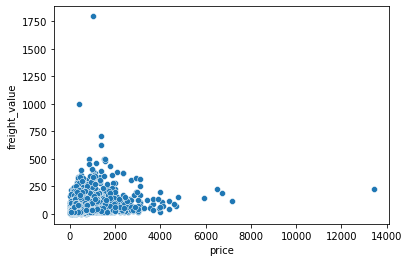

In [63]:
sns.scatterplot(x="price",y="freight_value", data=orders);

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

<AxesSubplot:>

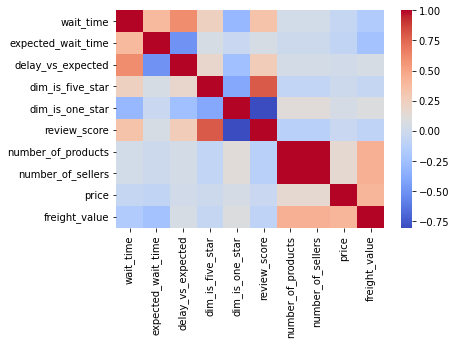

In [64]:
sns.heatmap(orders.corr(),cmap='coolwarm')

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

In [65]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.384692,0.601746,0.233594,-0.305563,0.333616,0.019932,0.019932,-0.055056,-0.167160
expected_wait_time,0.384692,1.000000,-0.504380,0.050269,-0.034616,0.052302,-0.015702,-0.015702,-0.076872,-0.239141
delay_vs_expected,0.601746,-0.504380,1.000000,0.175269,-0.255923,0.267027,0.032218,0.032218,0.014651,0.050456
dim_is_five_star,0.233594,0.050269,0.175269,1.000000,-0.396322,0.791787,-0.072527,-0.072527,-0.012929,-0.058843
dim_is_one_star,-0.305563,-0.034616,-0.255923,-0.396322,1.000000,-0.807700,0.119955,0.119955,0.044792,0.082611
review_score,0.333616,0.052302,0.267027,0.791787,-0.807700,1.000000,-0.123492,-0.123492,-0.034742,-0.090013
number_of_products,0.019932,-0.015702,0.032218,-0.072527,0.119955,-0.123492,1.000000,1.000000,0.153561,0.438307
number_of_sellers,0.019932,-0.015702,0.032218,-0.072527,0.119955,-0.123492,1.000000,1.000000,0.153561,0.438307
price,-0.055056,-0.076872,0.014651,-0.012929,0.044792,-0.034742,0.153561,0.153561,1.000000,0.410038
freight_value,-0.167160,-0.239141,0.050456,-0.058843,0.082611,-0.090013,0.438307,0.438307,0.410038,1.000000


## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [66]:
sampling = orders.sample(1000,random_state=1000)

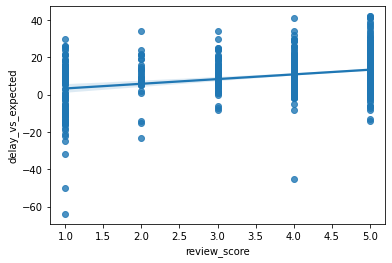

In [68]:
sns.regplot(data=sampling,x='review_score',y='delay_vs_expected');

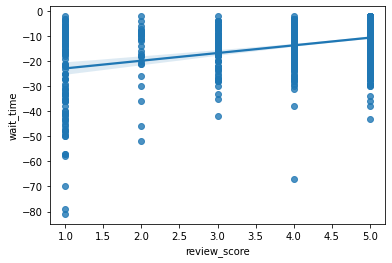

In [70]:
sns.regplot(data=sampling,x='review_score',y='wait_time');

In [71]:
sampling.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.433292,0.594353,0.289631,-0.401904,0.417543,-0.002327,-0.002327,-0.070683,-0.226356
expected_wait_time,0.433292,1.000000,-0.465854,0.087569,-0.041556,0.083591,-0.006096,-0.006096,-0.111528,-0.274152
delay_vs_expected,0.594353,-0.465854,1.000000,0.206692,-0.358118,0.335335,0.005884,0.005884,0.031524,0.024905
dim_is_five_star,0.289631,0.087569,0.206692,1.000000,-0.402163,0.786504,-0.101469,-0.101469,0.008682,-0.072171
dim_is_one_star,-0.401904,-0.041556,-0.358118,-0.402163,1.000000,-0.818547,0.187717,0.187717,-0.008644,0.083150
review_score,0.417543,0.083591,0.335335,0.786504,-0.818547,1.000000,-0.176926,-0.176926,0.016534,-0.102319
number_of_products,-0.002327,-0.006096,0.005884,-0.101469,0.187717,-0.176926,1.000000,1.000000,0.166651,0.524900
number_of_sellers,-0.002327,-0.006096,0.005884,-0.101469,0.187717,-0.176926,1.000000,1.000000,0.166651,0.524900
price,-0.070683,-0.111528,0.031524,0.008682,-0.008644,0.016534,0.166651,0.166651,1.000000,0.411407
freight_value,-0.226356,-0.274152,0.024905,-0.072171,0.083150,-0.102319,0.524900,0.524900,0.411407,1.000000


ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

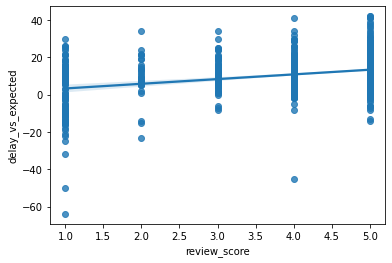

In [73]:
sns.regplot(data=sampling,x='review_score',y='delay_vs_expected',ci=95);

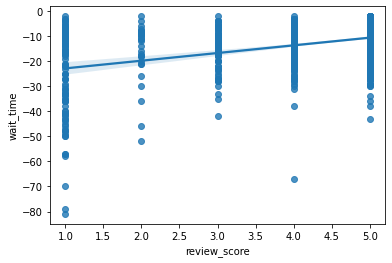

In [74]:
sns.regplot(data=sampling,x='review_score',y='wait_time');

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook